<a href="https://colab.research.google.com/github/Rana-S-Ali/IBM-Cognos-Analytics-Projects/blob/main/Step4_M4DataVisualization_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-12 12:59:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  43.8MB/s    in 0.8s    

2024-08-12 13:00:00 (43.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pastel_colors = ['#F2D0D9',  # Blush
                 '#B8C6D9',  # Cornflower Blue
                 '#F2D9D0',  # Light Salmon
                 '#F2A477',  # Clementine
                 '#F2C4C4',  # Baby Pink
                 '#F7F6CF',  # Yellow
                 '#B6D8F2']

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [9]:

table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT DevType, count(Respondent) as count FROM {}
group by DevType
ORDER BY count DESC
Limit 30
""".format(table_name)

df1 = pd.read_sql_query(QUERY,conn)
df1.head(30)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


# Hands-on Lab


## Visualizing distribution of data


In [10]:

QUERY = """
SELECT * FROM  master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()
df.set_index('index',inplace=True)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
index,,,,,,,,,,,,,,,,,,,,,
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

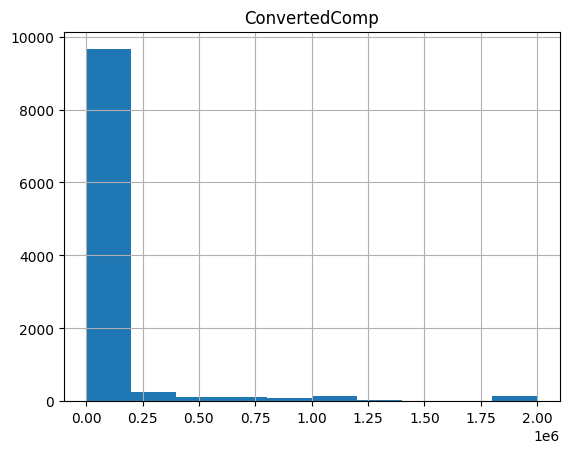

In [11]:
# your code goes here
df.hist(column='ConvertedComp')


### Box Plots


Plot a box plot of `Age.`


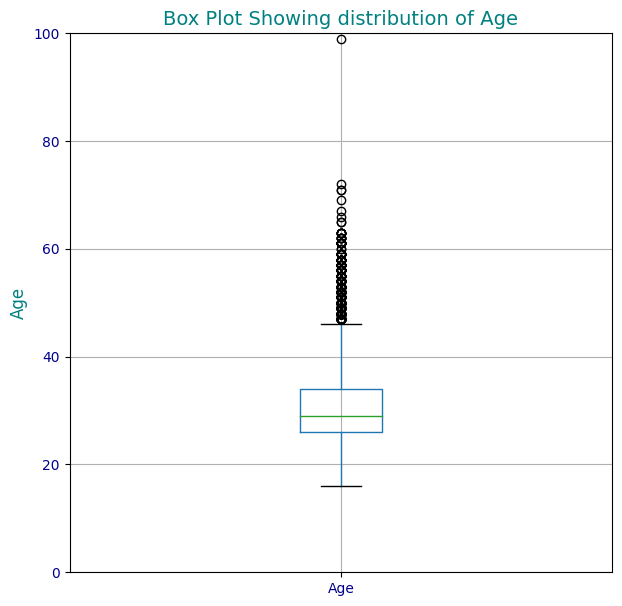

In [72]:
# your code goes here

df.boxplot(column='Age',figsize=(7,7))
# plt.xlabel("Age", color='#008080', fontsize=12)
plt.ylabel("Age", color='#008080', fontsize=12)
plt.title('Box Plot Showing distribution of Age',color='#008080', fontsize=14)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
# plt.xlim(0, 100)
plt.ylim(0, 100)
# plt.tight_layout()
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


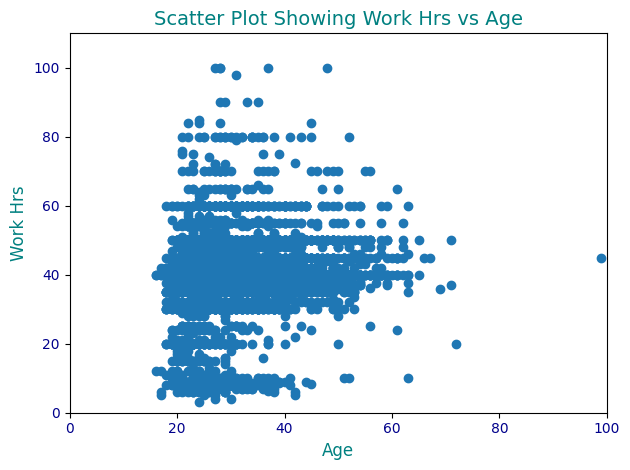

In [67]:
# your code goes here
plt.scatter(data= df, x='Age', y='WorkWeekHrs')
plt.xlabel("Age", color='#008080', fontsize=12)
plt.ylabel("Work Hrs", color='#008080', fontsize=12)
plt.title('Scatter Plot Showing Work Hrs vs Age',color='#008080', fontsize=14)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.xlim(0, 100)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


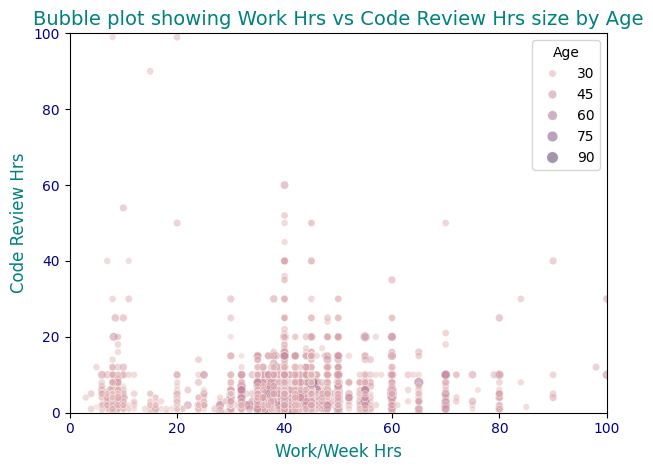

In [64]:
# your code goes here
# import matplotlib.cm as cm
# cmap = cm.get_cmap('Blues')  # Choose any colormap you like

# # Handle missing values before creating the plot
# df_subset = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])  # Drop rows with missing values

# size = df_subset['Age'].unique()
# # Normalize the size data for color mapping
# norm = plt.Normalize(min(size), max(size))

sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5)
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Age')
plt.xlabel("Work/Week Hrs", color='#008080', fontsize=12)
plt.ylabel("Code Review Hrs", color='#008080', fontsize=12)
plt.title('Bubble plot showing Work Hrs vs Code Review Hrs size by Age',color='#008080', fontsize=14)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [15]:
# # your code goes here
# # Create a colormap with a single color
# import matplotlib.cm as cm
# cmap = cm.get_cmap('Blues')  # Choose any colormap you like
# size = df['Age']
# # Normalize the size data for color mapping

# norm = plt.Normalize(min(size), max(size))
# sns.scatterplot(data = df, x='WorkWeekHrs', y='CodeRevHrs', size='Age',hue='Age', alpha=0.5, c=cmap(norm(size)))
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Age')
# plt.xlabel("Work Week Hours", size=16)
# plt.ylabel("CodeRevHrs", size=16)
# plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# print(df.head())

In [17]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate',
       'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [18]:
df.describe(include='all')

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
count,11398.000000,11398,11398,11398,11317,11398,11398,11347,11286,10661,...,10270,11392,11393,11398,11313,11111.000000,11275,11258,11379,11384
unique,NaN,2,2,4,3,2,135,3,9,12,...,6,3,3,6,6,NaN,2,2,3,3
top,NaN,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,No,No,Appropriate in length,Easy
freq,NaN,10618,9273,3652,5468,10968,3127,9658,5852,6953,...,4385,6387,5470,3873,8704,NaN,11196,6699,8048,8245
mean,12490.392437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.779318,NaN,NaN,NaN,NaN
std,7235.461999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.393680,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN
25%,6264.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN
50%,12484.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN
75%,18784.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN


In [19]:
QUERY = """
SELECT * FROM  DatabaseDesireNextYear
"""

df2 = pd.read_sql_query(QUERY,conn)
df2.head()
# df2.set_index('index',inplace=True)
# df2.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [75]:
df3 = df2.groupby('DatabaseDesireNextYear')['Respondent'].count().sort_values(ascending=False)
df3 = df3.head(5)
df3

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors as needed


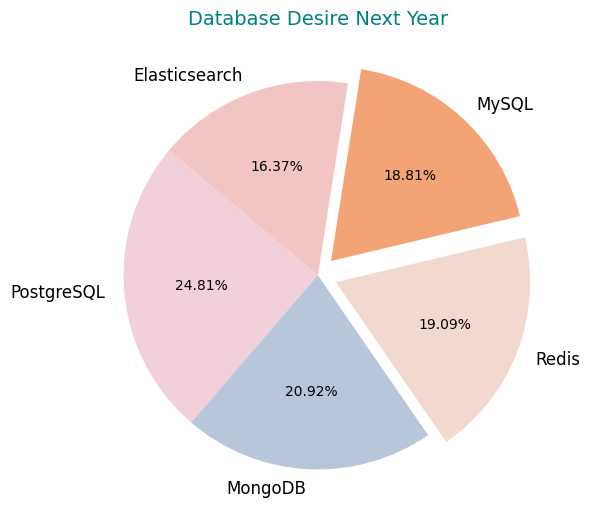

In [88]:
import matplotlib.pyplot as plt

# cmap = plt.cm.get_cmap('tab20')
# # Lighten the colormap by a factor of 0.5 (adjust as needed)
# lightened_cmap = lighten(cmap, 0.5)
# # Create the pie chart with brighter colors
# colors = lightened_cmap(np.linspace(0, 1, len(df3)))

pastel_colors = ['#F2D0D9',  # Blush
                 '#B8C6D9',  # Cornflower Blue
                 '#F2D9D0',  # Light Salmon
                 '#F2A477',  # Clementine
                 '#F2C4C4',  # Baby Pink
                 '#F7F6CF',  # Yellow
                 '#B6D8F2']  # Pale Turquoise
# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autopcts = plt.pie(df3, labels=df3.index, autopct='%1.2f%%', startangle=140,
                                 colors=pastel_colors, explode=[0, 0, 0.1,0.1, 0])  # Explode the third slice

# Customize labels and title
plt.setp(texts, color='black', fontsize=12)
plt.title('Database Desire Next Year', color='#008080', fontsize=14)

plt.tight_layout()
plt.show()


In [22]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate',
       'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [23]:
df['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work'],
      dtype=object)

In [24]:

QUERY = """
SELECT * FROM  LanguageWorkedWith
"""
#
df10 = pd.read_sql_query(QUERY,conn)
df10.head()
# df11 = df10.groupby('LanguageDesireNextYear')['Respondent'].count().sort_values(ascending=False)
# df11 = df11.head(5)


,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [25]:
QUERY = """
SELECT * FROM  DatabaseWorkedWith
"""
QUERY2 = """
SELECT count(Respondent)
FROM  DatabaseWorkedWith
where DatabaseWorkedWith = 'MySQL'
and Respondent not in (
    select Respondent
    from DatabaseWorkedWith
    where DatabaseWorkedWith <> 'MySQL' and Respondent is not null
)
"""
df_mysql = pd.read_sql_query(QUERY2,conn)
df_mysql.head()
print(df_mysql.iat[0,0])
# print(df_mysql.shape[0])

QUERY3 = """
SELECT Respondent
FROM  DatabaseWorkedWith
group by DatabaseWorkedWith, Respondent
having count(Respondent) = 1
where DatabaseWorkedWith = 'MySQL'
"""

# df_mysql1 = pd.read_sql_query(QUERY3,conn)
# df_mysql1.head()
# print(df_mysql1.shape[0])


474


In [26]:
df10 = pd.read_sql_query(QUERY,conn)
df10.head()
df10['DatabaseWorkedWith'] = df10['DatabaseWorkedWith'].dropna()
df10 = df10.dropna()

# Filter data into two DataFrames based on DatabaseWorkedWith
df_mysql = df10[df10['DatabaseWorkedWith'] == 'MySQL']
df_not_mysql = df10[df10['DatabaseWorkedWith'] != 'MySQL']

# Find respondents using only MySQL
df_mysql_only = df_mysql[~df_mysql['Respondent'].isin(df_not_mysql['Respondent'])]

# print(len(df10[df10['DatabaseWorkedWith']=='MySQL']))
# print("Using MySql:", df11)
# print("Not Using MySql:", df12)
# print("Using MySql only:",mysql)
# print("Number of using MySql only:", len(mysql))

In [27]:
df10.columns

Index(['Respondent', 'DatabaseWorkedWith'], dtype='object')

In [28]:
QUERY = """
SELECT * FROM  LanguageDesireNextYear
"""

df5 = pd.read_sql_query(QUERY,conn)
df5.head()
# df2.set_index('index',inplace=True)
# df2.head()
df6 = df5.groupby('LanguageDesireNextYear')['Respondent'].count().sort_values(ascending=False)
df6 = df6.head(5)
df6.head()
# df3.rename()

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


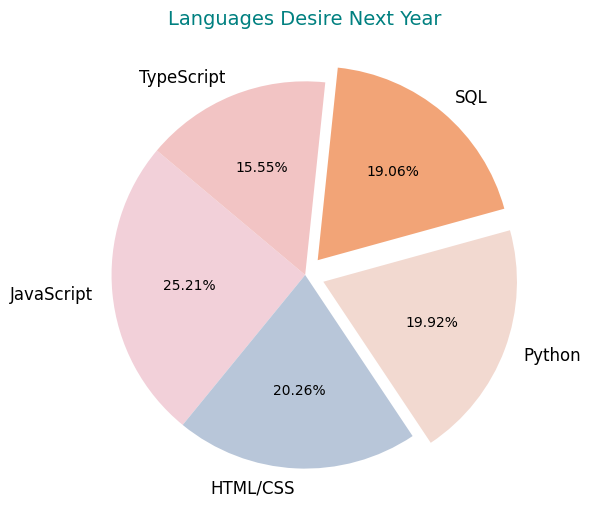

In [89]:

pastel_colors = ['#F2D0D9',  # Blush
                 '#B8C6D9',  # Cornflower Blue
                 '#F2D9D0',  # Light Salmon
                 '#F2A477',  # Clementine
                 '#F2C4C4',  # Baby Pink
                 '#F7F6CF',  # Yellow
                 '#B6D8F2',  # Pale Turquoise
                 '#D8BFD8',  # Lavender
                 '#C8F2D6',  # Mint Green
                 '#F2D9C9']  # Peach
# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autopcts = plt.pie(df6, labels=df6.index, autopct='%1.2f%%', startangle=140,
                                 colors=pastel_colors, explode=[0, 0, 0.1,0.1, 0])  # Explode the third slice

# Customize labels and title
plt.setp(texts, color='black', fontsize=12)
plt.title('Languages Desire Next Year', color='#008080', fontsize=14)

plt.tight_layout()
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


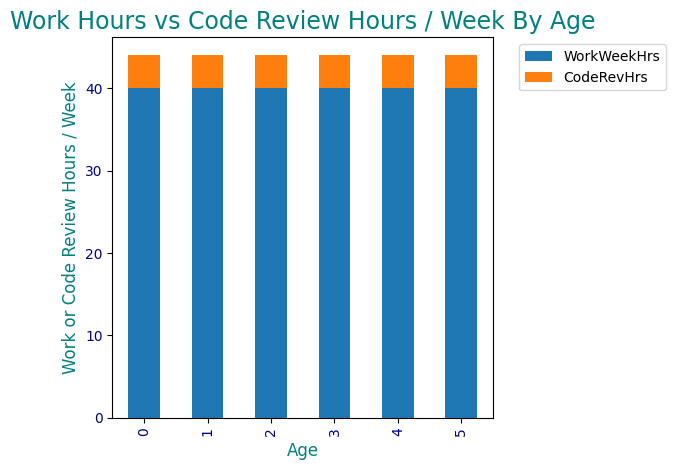

In [55]:
# your code goes here
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
# df3.head()
df3 = df.groupby('Age')[['WorkWeekHrs','CodeRevHrs']].median()
df3 = df3.loc[30:35]
df3.head(10)
df3.plot(kind='bar', stacked=True)
# plt.bar(data= df3, x=df3.index, )
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

plt.ylabel('Work or Code Review Hours / Week',color='#008080', fontsize=12)
plt.xlabel('Age',color='#008080', fontsize=12)
plt.title('Work Hours vs Code Review Hours / Week By Age',color='#008080', fontsize=17)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
df3.head()

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


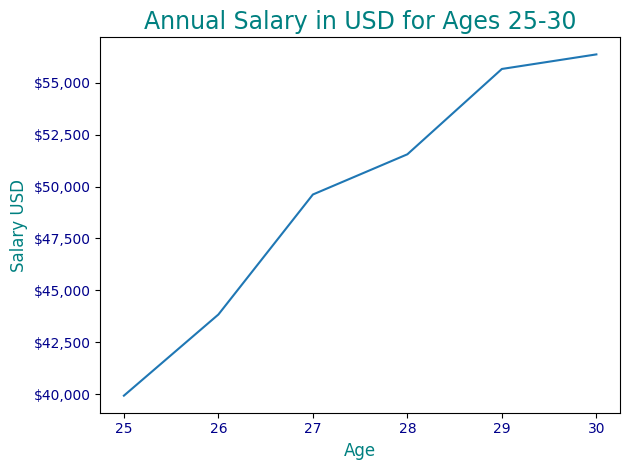

In [46]:
df.groupby('Age')['ConvertedComp'].median().loc[25:30].plot()

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.ylabel('Salary USD',color='#008080', fontsize=12)
plt.xlabel('Age',color='#008080', fontsize=12)
plt.title('Annual Salary in USD for Ages 25-30',color='#008080', fontsize=17)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.tight_layout()
plt.show()

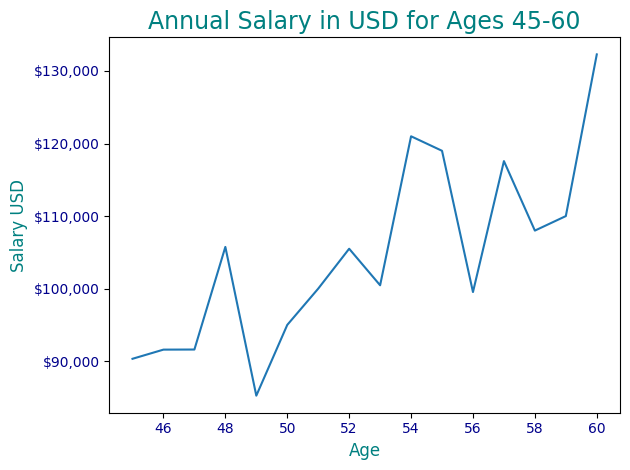

In [32]:
# your code goes here
df.groupby('Age')['ConvertedComp'].median().loc[45:60].plot()

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

plt.ylabel('Salary USD',color='#008080', fontsize=12)
plt.xlabel('Age',color='#008080', fontsize=12)
plt.title('Annual Salary in USD for Ages 45-60',color='#008080', fontsize=17)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.tight_layout()
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [33]:
'MainBranch' in df.columns

True

In [34]:
df['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work'],
      dtype=object)

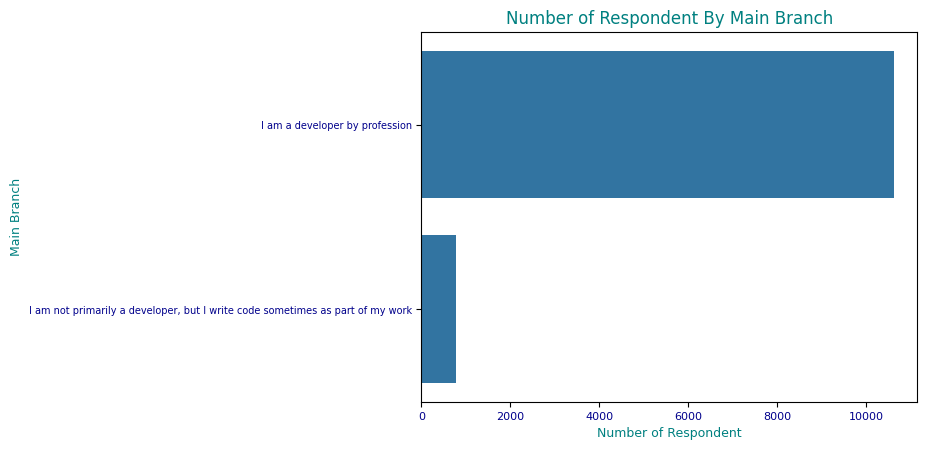

In [45]:
# your code goes here
# sns.barh(data=df, columns='MainBranch')
sns.countplot(y='MainBranch', data=df, order=df['MainBranch'].value_counts().index)

# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.ylabel('Main Branch',color='#008080', fontsize=9)
plt.xlabel('Number of Respondent',color='#008080', fontsize=9)
plt.title('Number of Respondent By Main Branch',color='#008080', fontsize=12)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks( fontsize=8,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=7,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
# plt.tight_layout()
plt.show()


Close the database connection.


In [36]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>


In [4]:
import pandas as pd
import json
import requests

def get_number_of_jobs_T(technology):
    tech = technology.lower()
    df = pd.read_json('jobs.json')
    filtered_df = df[df['Key Skills'].str.lower().str.contains(tech)]
    df.head()
    number_of_jobs = len(filtered_df)

    return technology, number_of_jobs

print(get_number_of_jobs_T("Python"))

('Python', 1173)


('Python', 1173)
techiC, the number of jobs for C is:25114
techiC#, the number of jobs for C# is:526
techiC++, the number of jobs for C++ is:506
techiJava, the number of jobs for Java is:3428
techiJavaScript, the number of jobs for JavaScript is:2248
techiPython, the number of jobs for Python is:1173
techiScala, the number of jobs for Scala is:138
techiOracle, the number of jobs for Oracle is:899
techiSQL Server, the number of jobs for SQL Server is:423
techiMySQL Server, the number of jobs for MySQL Server is:0
techiPostgreSQL, the number of jobs for PostgreSQL is:86
techiMongoDB, the number of jobs for MongoDB is:208


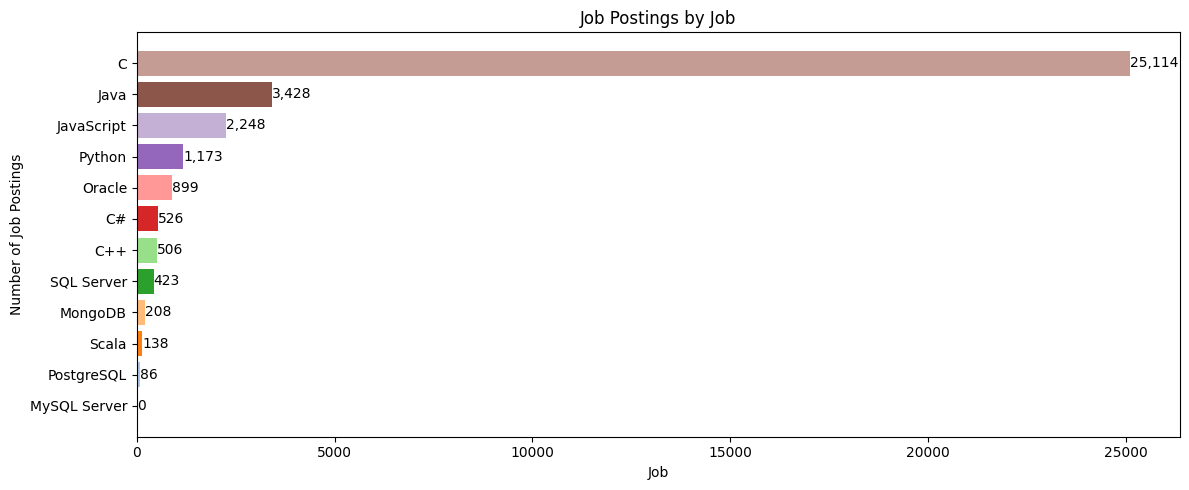

In [13]:
import pandas as pd
import json
import requests
from openpyxl import Workbook
import matplotlib.pyplot as plt

tech_list=['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']


def get_number_of_jobs_T(technology):
    tech = technology.lower()
    df = pd.read_json('jobs.json')
    if tech in ['c++','c#']:
        filtered_df = df[df['Key Skills'].str.lower().str.contains(tech, regex=False)]
    else: filtered_df = df[df['Key Skills'].str.lower().str.contains(tech)]
    df.head()
    number_of_jobs = len(filtered_df)

    return technology, number_of_jobs

print(get_number_of_jobs_T("Python"))

wb = Workbook()
ws = wb.active
ws.append(['Technology','Number_of_Jobs'])

for i in tech_list:
    tech,no = get_number_of_jobs_T(i)
    ws.append([tech,no])
    print(f"techi{i}, the number of jobs for {tech} is:{no}")

wb.save("github-job-postings.xlsx")
wb.close()

jobsCount = pd.read_excel("github-job-postings.xlsx")
jobsCount = jobsCount.sort_values('Number_of_Jobs', ascending=True)

jobsCount
plt.figure(figsize=(12,5))
plt.barh(data=jobsCount, width='Number_of_Jobs', y='Technology', color=plt.cm.tab20(range(len(jobsCount))))
plt.xlabel("Job")
plt.ylabel("Number of Job Postings")
plt.title("Job Postings by Job")
plt.tight_layout()

# add labels on right side of each bar
for i, value in enumerate(jobsCount['Number_of_Jobs']):
    plt.text(value, i, "{:,.0f}".format(value), ha='left', va='center')

plt.show()